In [1]:
from utilities import input_tools, boostHistHelpers as hh
from wremnants import theory_tools, theory_corrections, plot_tools
import uproot
import matplotlib.pyplot as plt
import hist
import pickle
import lz4.frame
import os
import numpy as np
from wremnants import syst_tools

Welcome to JupyROOT 6.26/06


2023-03-01 17:11:13.836988: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 17:11:14.203211: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /.singularity.d/libs
2023-03-01 17:11:14.203244: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-01 17:11:14.232855: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-01 17:11:15.056263: W

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
minloZ = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "ZmumuMiNLO", "nominal_gen")
nnlopsZ = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "ZmumuNNLOPS", "nominal_gen")
minnloZ = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "ZmumuPostVFP", "nominal_gen_pdfNNPDF31")[{"pdfVar" : "pdfpdfNNPDF310"}]
matrixZ = input_tools.read_matrixRadish_hist("/home/k/kelong/work/Generators/TheoryCorrections/MATRIX_RadISH/Zinclusive/run_matchMiNNLOEWParams/results/yZ__NNLO_QCD.dat", "Y")

In [245]:
dytrubo_z_2d_old

Hist(
  Variable(array([-5.  , -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25,
       -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  5.  ]), name='Y'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  55.,  60.,  65.,  70.,
        75.,  80.,  85.,  90.,  95., 100.]), underflow=False, name='qT'),
  storage=Weight()) # Sum: WeightedSum(value=2014.05, variance=0.00011566)

In [246]:
dytrubo_z_2d

Hist(
  Variable(array([-5.  , -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25,
       -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  5.  ]), name='Y'),
  Variable(array([  0.1,   1. ,   2. ,   3. ,   4. ,   5. ,   6. ,   7. ,   8. ,
         9. ,  10. ,  11. ,  12. ,  13. ,  14. ,  15. ,  16. ,  17. ,
        18. ,  19. ,  20. ,  21. ,  22. ,  23. ,  24. ,  25. ,  26. ,
        27. ,  28. ,  29. ,  30. ,  31. ,  32. ,  33. ,  34. ,  35. ,
        36. ,  37. ,  38. ,  39. ,  40. ,  41. ,  42. ,  43. ,  44. ,
        45. ,  46. ,  47. ,  48. ,  49. ,  50. ,  51. ,  52. ,  53. ,
        54. ,  55. ,  56. ,  57. ,  58. ,  59. ,  60. ,  61. ,  62. ,
        63. ,  64. ,  65. ,  66. ,  67. ,  68. ,  69. ,  70. ,  71. ,
        72. ,  73. ,  74. ,  75. ,  76. ,  77. ,  78. ,  79. ,  80. ,
        81. ,  82. ,  83. ,  84. ,  85. ,  86. ,  87. ,  88. ,  89. ,
        90. ,  91. ,  92. ,  93. ,  94. ,  95. ,  96. ,  97. ,  98. ,
        99. , 100. ]), name='qT'),
  storage=Weight()) # Sum: WeightedSum(value=2319.93, variance=0.000654255)

In [184]:
dytsf = dytrubo_z_2d_old.sum().value/dytrubo_z_2d.sum().value

In [114]:
minnloWm = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "WminusmunuPostVFP", "nominal_gen_pdfNNPDF31")[{"pdfVar" : "pdfpdfNNPDF310"}]
minnloWp = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "WplusmunuPostVFP", "nominal_gen_pdfNNPDF31")[{"pdfVar" : "pdfpdfNNPDF310"}]

In [211]:
dyturbo_msht20_Z = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Z/results_z-3d-scetlibmatch.txt"], axes=["Q", "Y", "qT"])

In [203]:
minloZ,nnlopsZ,minnloZ,matrixZ,dyturbo_nnlo_Z = hh.rebinHistsToCommon([minloZ,nnlopsZ,minnloZ,matrixZ,dyturbo_nnlo_Z], ("Y", "y"))

In [222]:
minnloZ_msht20 = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "ZmumuPostVFP", "nominal_gen_pdfMSHT20")[{"pdfVar" : "pdf0MSHT20"}]

In [255]:
input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_wp-1d-yw-nnlo-all-scetlibmatch-from0p0.txt"], axes=["Y"])

Hist(Variable(array([-5.  , -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25,
       -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  5.  ]), name='Y'), storage=Weight()) # Sum: WeightedSum(value=11350.7, variance=0.0110902)

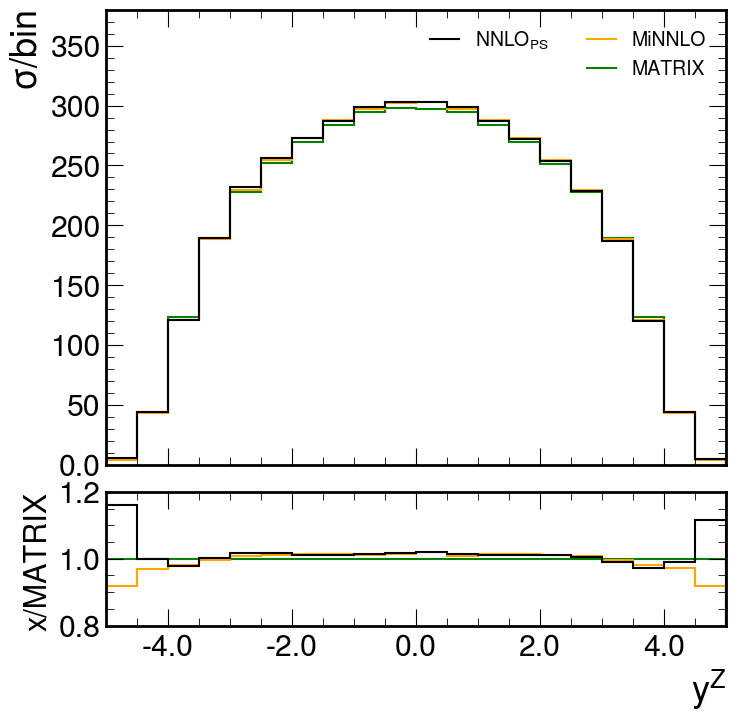

In [207]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                matrixZ[{"vars" : 0}].project("Y"), minnloZ.project("y"), 
                nnlopsZ.project("y"), 
            ],
            ["MATRIX", "MiNNLO", 'NNLO$_{PS}$',], 
            colors=["green", "orange", 'black',], 
            xlabel="y$^{Z}$", 
            ylabel=f"$\sigma$/bin",
            rlabel="x/MATRIX",
            rrange=[0.8, 1.2],
            ylim=[0,380],
            xlim=None, binwnorm=1.0, baseline=True)
out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/Z"
plot_tools.make_plot_dir(out, "NNPDF31")
out = os.path.join(out, "NNPDF31")
plot_tools.save_pdf_and_png(out, "y_NNLOPS_MiNNLO")
plot_tools.write_index_and_log(out, "y_NNLOPS_MiNNLO")

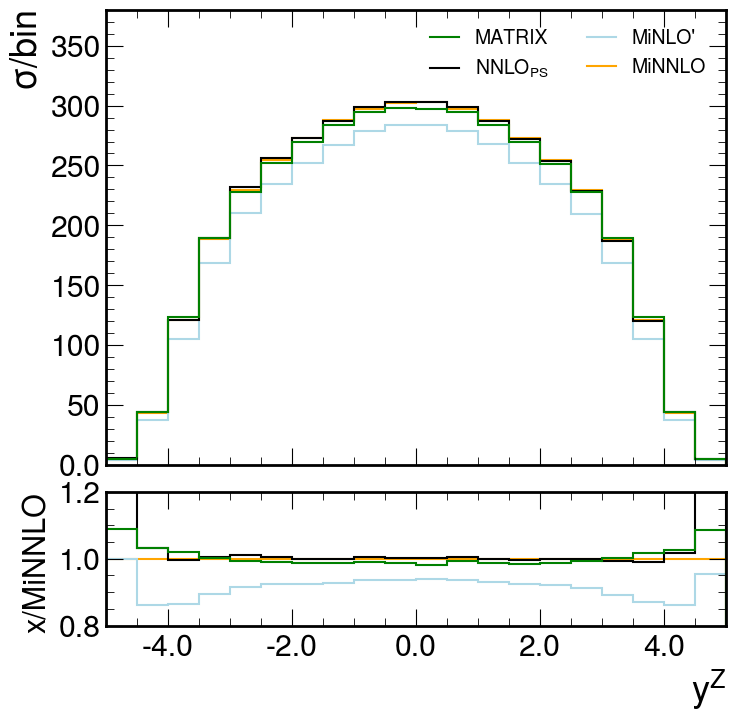

In [119]:
fig = plot_tools.makePlotWithRatioToRef(
            [x.project("y") for x in 
                 [minnloZ, minloZ, nnlopsZ, ]
            ]+[matrixZ[{"vars" : 0}]],
            ["MiNNLO", "MiNLO'", "NNLO$_{PS}$", "MATRIX", ], 
            colors=["orange", "lightblue", "black", "green",], 
            xlabel="y$^{Z}$", 
            ylabel=f"$\sigma$/bin",
            rlabel="x/MiNNLO",
            rrange=[0.8, 1.2],
            ylim=[0,380],
            xlim=None, binwnorm=1.0, baseline=True)
out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/Z"
plot_tools.make_plot_dir(out, "NNPDF31")
out = os.path.join(out, "NNPDF31")
plot_tools.save_pdf_and_png(out, "y_NNLOPS_MiNLO_MiNNLO")
plot_tools.write_index_and_log(out, "y_NNLOPS_MiNLO_MiNNLO")

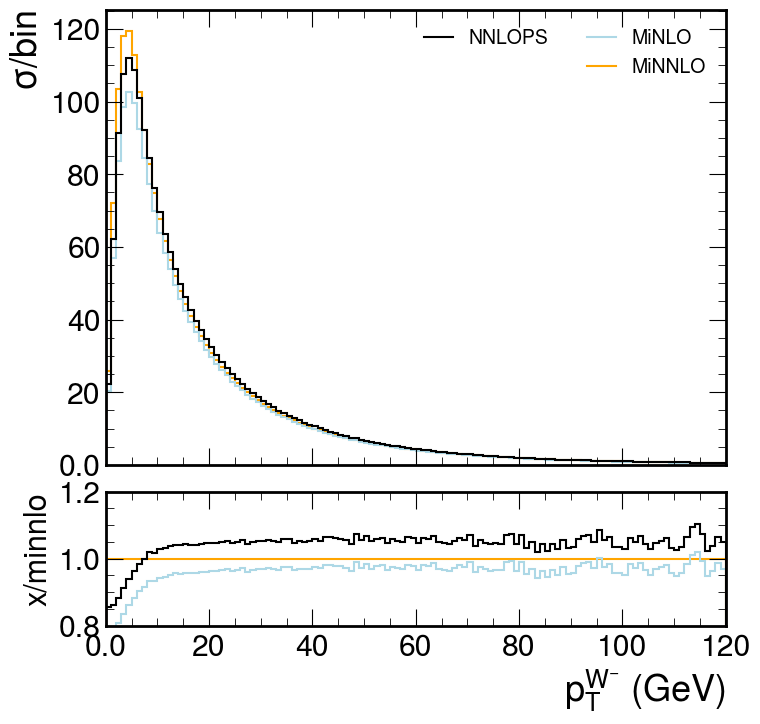

In [112]:
    fig = plot_tools.makePlotWithRatioToRef(
            [minnloZ.project("ptVgen")[0:120.j],
             minloZ.project("ptVgen")[0:120.j], 
             nnlopsZ.project("ptVgen")[0:120.j]], 
            ["MiNNLO", "MiNLO", 'NNLOPS',], 
            colors=['orange', 'lightblue', 'black',], 
            xlabel="p$_{T}^{W^{-}}$ (GeV)", 
            ylabel=f"$\sigma$/bin",
            rlabel="x/minnlo",
            rrange=[0.8, 1.2],
            #ylim=[-0.8,-0.3],
            xlim=None, binwnorm=1.0, baseline=True)
    
out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/Z"
plot_tools.make_plot_dir(out, "NNPDF31")
out = os.path.join(out, "NNPDF31")
plot_tools.save_pdf_and_png(out, "ptVgen_NNLOPS_MiNNLO")
plot_tools.write_index_and_log(out, "ptVgen_NNLOPS_MiNNLO")

In [92]:
dyturboZ_nnlo = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Z/nnpdf31/rapidities/results_z0_nnlo_nnpdf31nnlo_yw.txt"], axes=["y"])
dyturboZ_nlo_nnlopdf = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Z/nnpdf31/rapidities/results_z0_nlo_nnpdf31nnlo_yw.txt"], axes=["y"])
dyturboZ_nlo_nlopdf = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Z/nnpdf31/rapidities/results_z0_nlo_nnpdf31nlo_yw.txt"], axes=["y"])

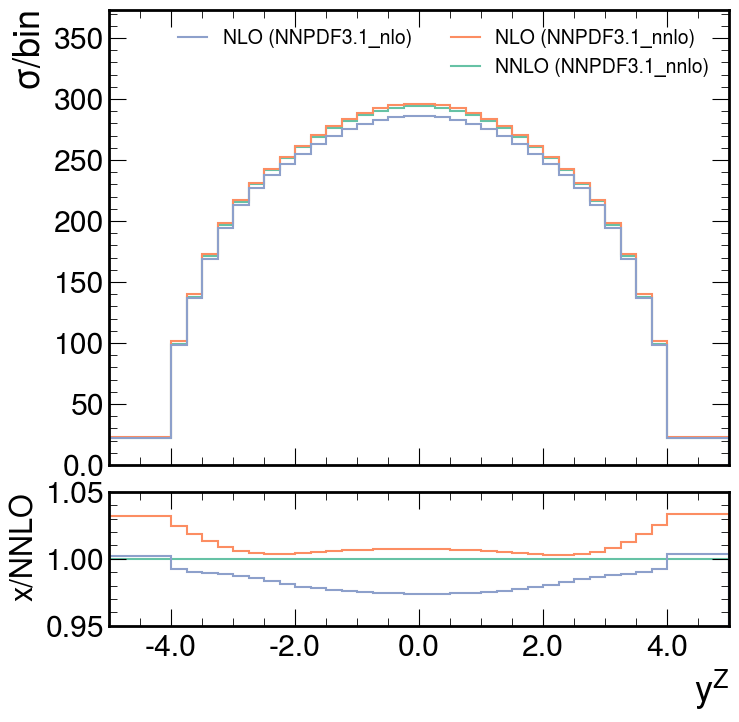

In [93]:
    fig = plot_tools.makePlotWithRatioToRef(
            [dyturboZ_nnlo,
             dyturboZ_nlo_nnlopdf, 
             dyturboZ_nlo_nlopdf], 
            ["NNLO (NNPDF3.1_nnlo)", "NLO (NNPDF3.1_nnlo)", 'NLO (NNPDF3.1_nlo)',], 
            colors=['#66c2a5', '#fc8d62', '#8da0cb',], 
            xlabel="y$^{Z}$", 
            ylabel=f"$\sigma$/bin",
            rlabel="x/NNLO",
            rrange=[0.95, 1.05],
            yscale=1.2,
            xlim=None, binwnorm=1.0, baseline=True)
    
out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/Z"
plot_tools.make_plot_dir(out, "NNPDF31")
out = os.path.join(out, "NNPDF31")
plot_tools.save_pdf_and_png(out, "y_fixedOrder_NNLOvsNLO")
plot_tools.write_index_and_log(out, "y_fixedOrder_NNLOvsNLO")

In [94]:
dyturboWm_nnlo = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Wm/nnpdf31/results_wm_nnlo_nnpdf31nnlo_yw.txt"], axes=["y"])
dyturboWm_nlo_nnlopdf = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Wm/nnpdf31/results_wm_nlo_nnpdf31nnlo_yw.txt"], axes=["y"])
dyturboWm_nlo_nlopdf = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Wm/nnpdf31/results_wm_nlo_nnpdf31nlo_yw.txt"], axes=["y"])

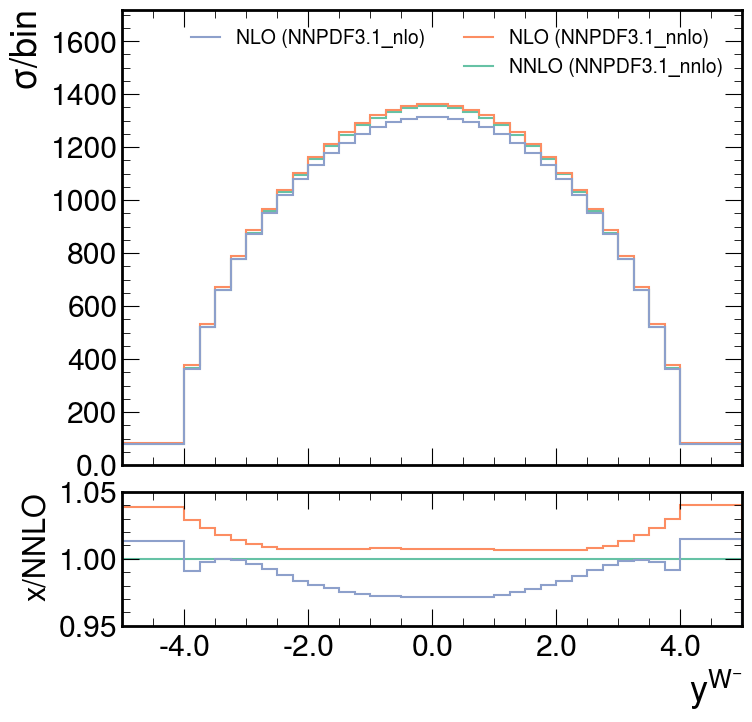

In [95]:
    fig = plot_tools.makePlotWithRatioToRef(
            [dyturboWm_nnlo,
             dyturboWm_nlo_nnlopdf, 
             dyturboWm_nlo_nlopdf], 
            ["NNLO (NNPDF3.1_nnlo)", "NLO (NNPDF3.1_nnlo)", 'NLO (NNPDF3.1_nlo)',], 
            colors=['#66c2a5', '#fc8d62', '#8da0cb',], 
            xlabel="y$^{W^{-}}$", 
            ylabel=f"$\sigma$/bin",
            rlabel="x/NNLO",
            rrange=[0.95, 1.05],
            yscale=1.2,
            xlim=None, binwnorm=1.0, baseline=True)
    
out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/W"
plot_tools.make_plot_dir(out, "NNPDF31")
out = os.path.join(out, "NNPDF31")
plot_tools.save_pdf_and_png(out, "y_Wm_fixedOrder_NNLOvsNLO")
plot_tools.write_index_and_log(out, "y_Wm_fixedOrder_NNLOvsNLO")

In [96]:
dyturboWp_nnlo = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Wp/nnpdf31/results_wp_nnlo_nnpdf31nnlo_yw.txt"], axes=["y"])
dyturboWp_nlo_nnlopdf = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Wp/nnpdf31/results_wp_nlo_nnpdf31nnlo_yw.txt"], axes=["y"])
dyturboWp_nlo_nlopdf = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Wp/nnpdf31/results_wp_nlo_nnpdf31nlo_yw.txt"], axes=["y"])

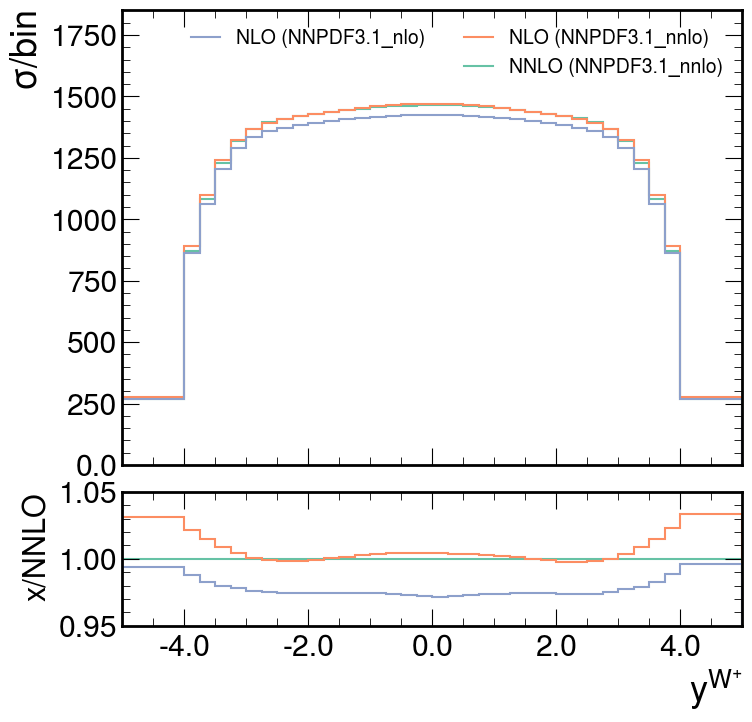

In [97]:
    fig = plot_tools.makePlotWithRatioToRef(
            [dyturboWp_nnlo,
             dyturboWp_nlo_nnlopdf, 
             dyturboWp_nlo_nlopdf], 
            ["NNLO (NNPDF3.1_nnlo)", "NLO (NNPDF3.1_nnlo)", 'NLO (NNPDF3.1_nlo)',], 
            colors=['#66c2a5', '#fc8d62', '#8da0cb',], 
            xlabel="y$^{W^{+}}$", 
            ylabel=f"$\sigma$/bin",
            rlabel="x/NNLO",
            rrange=[0.95, 1.05],
            yscale=1.2,
            xlim=None, binwnorm=1.0, baseline=True)
    
out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/W"
plot_tools.make_plot_dir(out, "NNPDF31")
out = os.path.join(out, "NNPDF31")
plot_tools.save_pdf_and_png(out, "y_Wp_fixedOrder_NNLOvsNLO")
plot_tools.write_index_and_log(out, "y_Wp_fixedOrder_NNLOvsNLO")

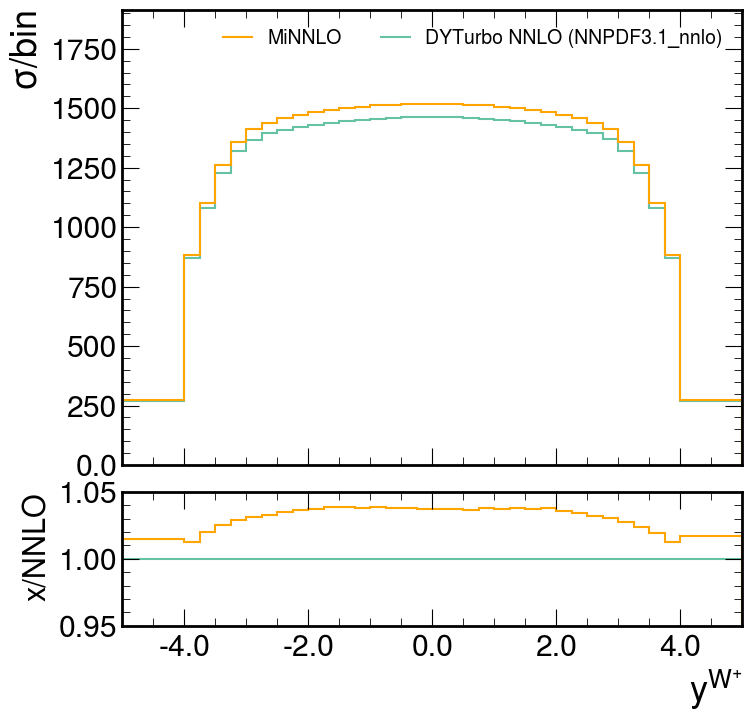

In [115]:
dyturboWp_nnlo_rebin, minnloWp_rebin = hh.rebinHistsToCommon([dyturboWp_nnlo, minnloWp.project("y")], 0)

fig = plot_tools.makePlotWithRatioToRef(
            [dyturboWp_nnlo_rebin, 
             minnloWp_rebin], 
            ["DYTurbo NNLO (NNPDF3.1_nnlo)", "MiNNLO",], 
            colors=['#66c2a5', 'orange',], 
            xlabel="y$^{W^{+}}$", 
            ylabel=f"$\sigma$/bin",
            rlabel="x/NNLO",
            rrange=[0.95, 1.05],
            yscale=1.2,
            xlim=None, binwnorm=1.0, baseline=True)
    
out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/W"
plot_tools.make_plot_dir(out, "NNPDF31")
out = os.path.join(out, "NNPDF31")
plot_tools.save_pdf_and_png(out, "y_Wp_fixedOrder_DYTurboMiNNLO")
plot_tools.write_index_and_log(out, "y_Wp_fixedOrder_DYTurboMiNNLO")

In [ ]:
dyturboWp_nnlo_msht20 = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/Wp/nnpdf31/results_wp_nnlo_nnpdf31nnlo_yw.txt"], axes=["y"])

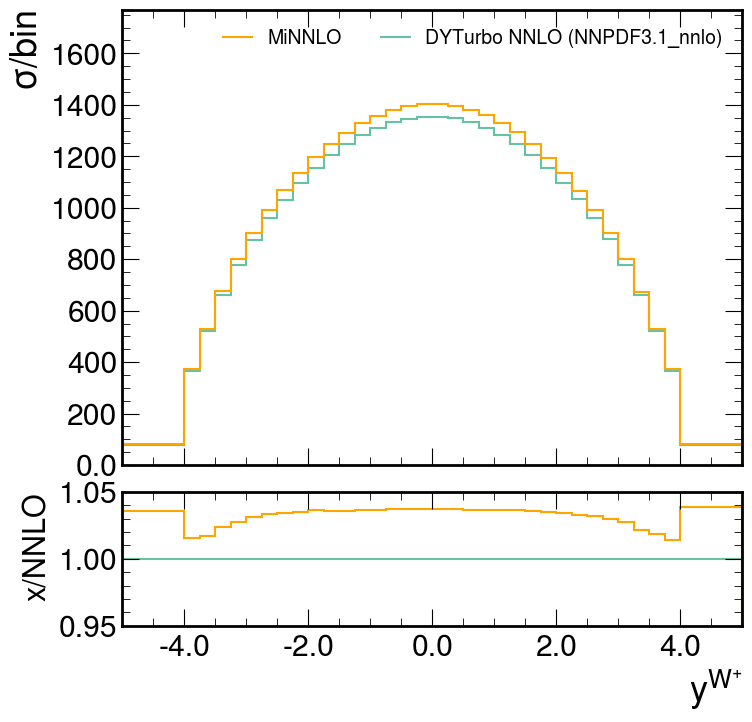

In [116]:
dyturboWm_nnlo_rebin, minnloWm_rebin = hh.rebinHistsToCommon([dyturboWm_nnlo, minnloWm.project("y")], 0)

fig = plot_tools.makePlotWithRatioToRef(
            [dyturboWm_nnlo_rebin, 
             minnloWm_rebin], 
            ["DYTurbo NNLO (NNPDF3.1_nnlo)", "MiNNLO",], 
            colors=['#66c2a5', 'orange',], 
            xlabel="y$^{W^{+}}$", 
            ylabel=f"$\sigma$/bin",
            rlabel="x/NNLO",
            rrange=[0.95, 1.05],
            yscale=1.2,
            xlim=None, binwnorm=1.0, baseline=True)
    
out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/W"
plot_tools.make_plot_dir(out, "NNPDF31")
out = os.path.join(out, "NNPDF31")
plot_tools.save_pdf_and_png(out, "y_Wp_fixedOrder_DYTurboMiNNLO")
plot_tools.write_index_and_log(out, "y_Wp_fixedOrder_DYTurboMiNNLO")

In [136]:
minnloWm_msht20 = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "WminusmunuPostVFP", "nominal_gen")
dyturboWm = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_wm-2d-nnlo-vj-scetlibmatch.txt"], axes=("Y", "qT"))

In [128]:
minnloWm_msht20_y, dyturboWm_y = hh.rebinHistsToCommon([minnloWm_msht20, dyturboWm], ("y", "Y"))

In [137]:
minnloWp_msht20 = input_tools.read_and_scale("/scratch/kelong/Analysis/w_z_gen_dists.hdf5", "WplusmunuPostVFP", "nominal_gen")
dyturboWp = input_tools.read_dyturbo_hist(["/scratch/shared/TheoryPredictions/DYTurbo/scetlib_validation/results_wp-2d-nnlo-vj-scetlibmatch.txt"], axes=("Y", "qT"))

In [138]:
minnloWp_msht20_y, dyturboWp_y = hh.rebinHistsToCommon([minnloWp_msht20, dyturboWp], ("y", "Y"))

In [242]:
minnloZ_msht20_y, dyturboZ_msht20_y, minnloZ_y, dyturboZ_nnlo_y = hh.rebinHistsToCommon([minnloZ_msht20[...,:100.j].project("y"), dyturbo_msht20_Z.project("Y"), minnloZ[...,:100.j].project("y"), dyturboZ_nnlo.project("y")], 0)

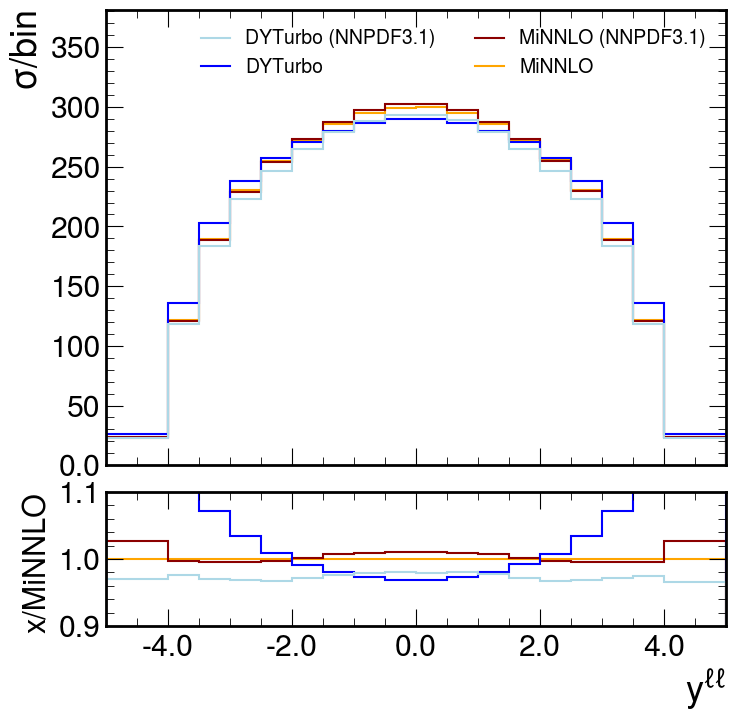

In [244]:
fig = plot_tools.makePlotWithRatioToRef(
            [minnloZ_msht20_y, 
             minnloZ_y,
             dyturboZ_msht20_y,
             dyturboZ_nnlo_y
            ], 
            ["MiNNLO", "MiNNLO (NNPDF3.1)", "DYTurbo", "DYTurbo (NNPDF3.1)"], 
            colors=['orange', "darkred", 'blue', 'lightblue'], 
            xlabel=r"y$^{\ell\ell}$", 
            ylabel=f"$\sigma$/bin",
            rlabel="x/MiNNLO",
            rrange=[0.9, 1.1],
            yscale=1.2,
            xlim=None, binwnorm=1.0, baseline=True)

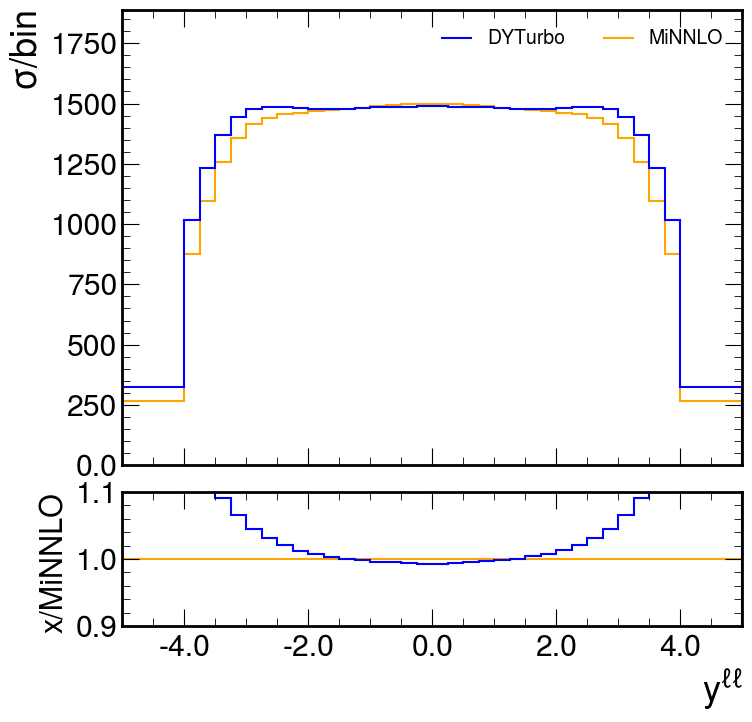

In [232]:
fig = plot_tools.makePlotWithRatioToRef(
            [minnloWp_msht20_y[...,:100.j,].project("y"), 
             dyturboWp_y.project("Y")*dytsfZ], 
            ["MiNNLO", "DYTurbo",], 
            colors=['orange', 'blue',], 
            xlabel=r"y$^{\ell\ell}$", 
            ylabel=f"$\sigma$/bin",
            rlabel="x/MiNNLO",
            rrange=[0.9, 1.1],
            yscale=1.2,
            xlim=None, binwnorm=1.0, baseline=True)

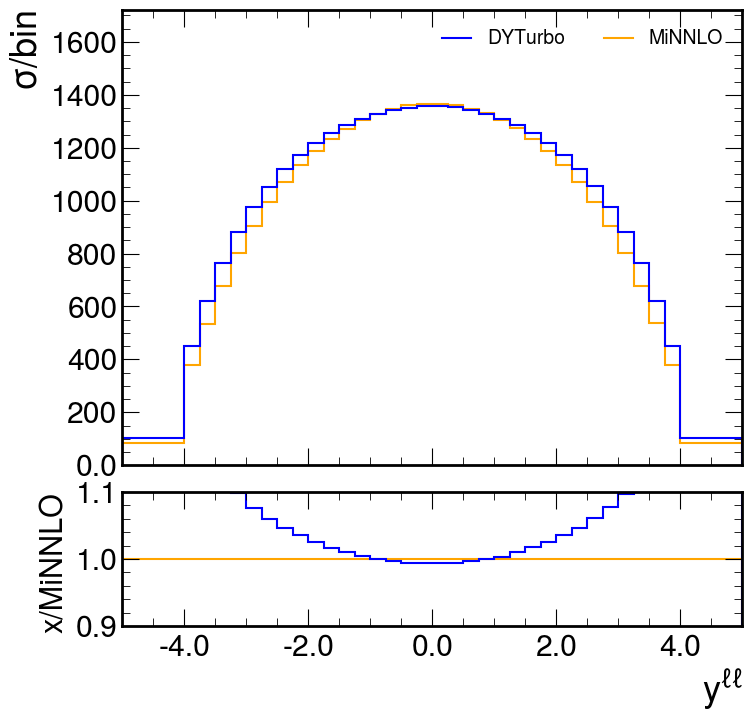

In [233]:
fig = plot_tools.makePlotWithRatioToRef(
            [minnloWm_msht20_y[...,:100.j,].project("y"), 
             dyturboWm_y.project("Y")*dytsfZ], 
            ["MiNNLO", "DYTurbo",], 
            colors=['orange', 'blue',], 
            xlabel=r"y$^{\ell\ell}$", 
            ylabel=f"$\sigma$/bin",
            rlabel="x/MiNNLO",
            rrange=[0.9, 1.1],
            yscale=1.2,
            xlim=None, binwnorm=1.0, baseline=True)